Q1. Please answer the following questions in your own words.

1.How are trees constructed?
Trees are supervised learning algorithms that are constructed from a dataset with known outcomes and used to predict future outcomes. The trees are made up of decision nodes at which a decision is made based on data gathered. This goes on until you have a set of final outcomes at the "bottom" of the tree where the final prediction is. 

2.How do trees handle non-linear relationships between variables? Compare this to linear models.
The trees work by splitting samples into just two sections based on relationships between variables, not looking for one single overall pattern. This allows the trees to be a lot more flexible in modeling non-linear relationships. Linear models on the other hand are not going to be able to divide up the variables in the data in this way, meaning that they are far less effective at being accurate predictors for non-linear datasets. 

3.Why is the Gini a good loss function for categorical target variables?
Gini, or gini impurity, is a good loss function because it determines the chances that a decision will be made correctly at a certain decision node. A low gini score means that theres a low number of data being misclassified and in doing so sets up the tree with splits that have the chance for the most accuracy. It works best for categorical variables because it operates in a way similar to them by identifying the odds of a correct prediction in one or two categories, which make up each decision node

4.Why do trees tend to overfit, and how can this tendency be constrained?
Trees tend to ovrefit because its in their nature as "greedy" algorithms. They will keep splitting until they cannot anymore which can increase the chances of overfitting as the trees get too specific. To combat or constrain overfitting, you can limit the number of decision nodes. Limit its depth so it isn't making as many splits, which is what is causing the ovrefitting

5.True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.
False. Trees work well with categorical variables and that is often how they are used, but they can also be used for regression with numerical variables and split based on certain ranges of numbers

6.Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
You probably could try and split into more than two branches, but the tree would quickly become overcomplicated as each time you add an additional split thats more splits added onto the next level of the tree. By keeping the model clearer with only two choices at each decision node at a time, it will likely be more efficient and less vulnerable to extreme overfitting

7.What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?
If a tree has way too many splits or decision nodes, it is probably very vulnerable to overfitting. The tree may also be underfitting if the populations it splits to are too homogenous.

Q4: This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

Load the ./data/corporate_ratings.csv dataset. How many observations and variables does it contain? Print out the first few rows of data.

In [1]:
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('/Users/averyanderson/Desktop/data/corporate_ratings.csv',low_memory=False) #read in data

In [3]:
df.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [7]:
columns = df.columns.tolist()
print(columns)

['Rating', 'Name', 'Symbol', 'Rating Agency Name', 'Date', 'Sector', 'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding', 'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin', 'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed', 'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover', 'debtEquityRatio', 'debtRatio', 'effectiveTaxRate', 'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare', 'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue', 'enterpriseValueMultiple', 'operatingCashFlowPerShare', 'operatingCashFlowSalesRatio', 'payablesTurnover']


Plot a histogram of the ratings variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

<Axes: >

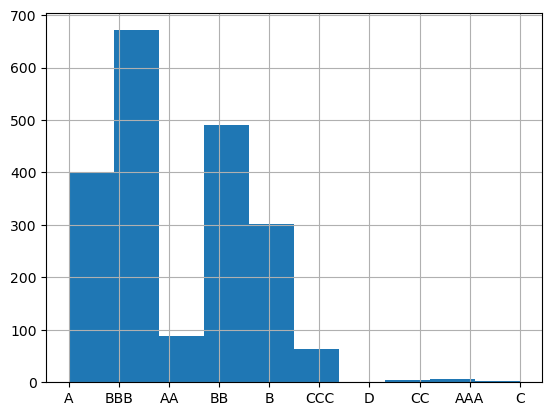

In [10]:
df['Rating'].hist()

Use all of the variables except Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix .

In [13]:
df = pd.get_dummies(df, columns=['Sector'])

In [15]:
df.head()

,Rating,Name,Symbol,Rating Agency Name,Date,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,...,Sector_Consumer Durables,Sector_Consumer Non-Durables,Sector_Consumer Services,Sector_Energy,Sector_Finance,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,Sector_Technology,Sector_Transportation
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,0.945894,0.426395,0.099690,44.203245,0.037480,...,True,False,False,False,False,False,False,False,False,False
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,1.033559,0.498234,0.203120,38.991156,0.044062,...,True,False,False,False,False,False,False,False,False,False
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,0.963703,0.451505,0.122099,50.841385,0.032709,...,True,False,False,False,False,False,False,False,False,False
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,1.019851,0.510402,0.176116,41.161738,0.020894,...,True,False,False,False,False,False,False,False,False,False
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,0.957844,0.495432,0.141608,47.761126,0.042861,...,True,False,False,False,False,False,False,False,False,False


In [17]:
columns = df.columns.tolist()
print(columns)

['Rating', 'Name', 'Symbol', 'Rating Agency Name', 'Date', 'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding', 'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin', 'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed', 'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover', 'debtEquityRatio', 'debtRatio', 'effectiveTaxRate', 'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare', 'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue', 'enterpriseValueMultiple', 'operatingCashFlowPerShare', 'operatingCashFlowSalesRatio', 'payablesTurnover', 'Sector_Basic Industries', 'Sector_Capital Goods', 'Sector_Consumer Durables', 'Sector_Consumer Non-Durables', 'Sector_Consumer Services', 'Sector_Energy', 'Sector_Finance', 'Sector_Health Care', 'Sector_Miscellaneous', 'Sector_Public Utilities', 'Sector_Technology', 'Sector_Transportation']


In [19]:
from sklearn.linear_model import LinearRegression # Import linear regression model

y = df['Rating'] # Target variable

vars = ['currentRatio',
        'quickRatio', 'cashRatio', 'daysOfSalesOutstanding', 'netProfitMargin', 
        'pretaxProfitMargin', 'grossProfitMargin', 'operatingProfitMargin', 'returnOnAssets', 
        'returnOnCapitalEmployed', 'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover', 
        'debtEquityRatio', 'debtRatio', 'effectiveTaxRate', 'freeCashFlowOperatingCashFlowRatio', 
        'freeCashFlowPerShare', 'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue',
        'enterpriseValueMultiple', 'operatingCashFlowPerShare', 'operatingCashFlowSalesRatio', 
        'payablesTurnover', 'Sector_Basic Industries', 'Sector_Capital Goods', 'Sector_Consumer Durables',
        'Sector_Consumer Non-Durables', 'Sector_Consumer Services', 'Sector_Energy', 'Sector_Finance', 
        'Sector_Health Care', 'Sector_Miscellaneous', 'Sector_Public Utilities', 'Sector_Technology', 
        'Sector_Transportation']

X = df.loc[:,vars] # Construct data matrix
X.head() # Peek at data

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Sector_Consumer Durables,Sector_Consumer Non-Durables,Sector_Consumer Services,Sector_Energy,Sector_Finance,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,Sector_Technology,Sector_Transportation
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,True,False,False,False,False,False,False,False,False,False
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,True,False,False,False,False,False,False,False,False,False
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,True,False,False,False,False,False,False,False,False,False
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,True,False,False,False,False,False,False,False,False,False
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,True,False,False,False,False,False,False,False,False,False


Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

[Text(0.487758015862256, 0.9722222222222222, 'operatingCashFlowPerShare <= 2.799\ngini = 0.766\nsamples = 1623\nvalue = [307.0, 70.0, 6.0, 232.0, 390.0, 556.0, 2.0, 5.0, 55.0]'),
 Text(0.22885032537960953, 0.9166666666666666, 'returnOnCapitalEmployed <= 0.127\ngini = 0.751\nsamples = 497\nvalue = [30, 9, 0, 138, 167, 110, 2, 4, 37]'),
 Text(0.15509761388286333, 0.8611111111111112, 'debtRatio <= 0.725\ngini = 0.732\nsamples = 427\nvalue = [18, 8, 0, 130, 158, 73, 0, 4, 36]'),
 Text(0.08839479392624729, 0.8055555555555556, 'returnOnEquity <= 0.079\ngini = 0.71\nsamples = 269\nvalue = [17, 6, 0, 58, 116, 61, 0, 0, 11]'),
 Text(0.0509761388286334, 0.75, 'grossProfitMargin <= 0.793\ngini = 0.644\nsamples = 156\nvalue = [2, 0, 0, 44, 78, 24, 0, 0, 8]'),
 Text(0.03253796095444685, 0.6944444444444444, 'operatingCashFlowSalesRatio <= 0.045\ngini = 0.623\nsamples = 137\nvalue = [2, 0, 0, 34, 73, 24, 0, 0, 4]'),
 Text(0.008676789587852495, 0.6388888888888888, 'payablesTurnover <= 4.917\ngini = 0.

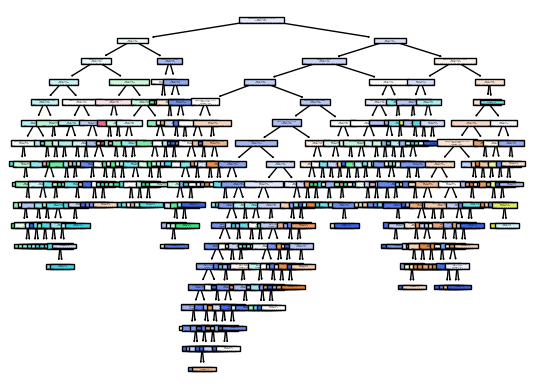

In [22]:
## Fit the Model:
from sklearn.model_selection import train_test_split
from sklearn import tree # Import the tree classifier
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Plot the tree

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

cart = tree.DecisionTreeClassifier(min_samples_leaf = 5) # Control min leaf size
cart = cart.fit(X_train, y_train) # Fit the classifier
y_hat = cart.predict(X_test)
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)

In [24]:
## Confusion Matrix:
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = np.trace(tab)/len(y_test) # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

Accuracy:  0.4458128078817734 



col_0,A,AA,AAA,B,BB,BBB,CCC
Rating,,,,,,,
A,50,9,0,1,6,25,0
AA,7,4,0,0,4,4,0
AAA,0,0,0,0,0,1,0
B,10,1,0,32,12,9,6
BB,15,1,1,25,31,24,3
BBB,21,2,0,10,19,63,0
CCC,1,0,0,7,0,0,1
D,0,0,0,0,0,1,0


If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [27]:
df2 = pd.get_dummies(df, columns=['Rating Agency Name'])
columns = df2.columns.tolist()
print(columns)

['Rating', 'Name', 'Symbol', 'Date', 'currentRatio', 'quickRatio', 'cashRatio', 'daysOfSalesOutstanding', 'netProfitMargin', 'pretaxProfitMargin', 'grossProfitMargin', 'operatingProfitMargin', 'returnOnAssets', 'returnOnCapitalEmployed', 'returnOnEquity', 'assetTurnover', 'fixedAssetTurnover', 'debtEquityRatio', 'debtRatio', 'effectiveTaxRate', 'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare', 'cashPerShare', 'companyEquityMultiplier', 'ebitPerRevenue', 'enterpriseValueMultiple', 'operatingCashFlowPerShare', 'operatingCashFlowSalesRatio', 'payablesTurnover', 'Sector_Basic Industries', 'Sector_Capital Goods', 'Sector_Consumer Durables', 'Sector_Consumer Non-Durables', 'Sector_Consumer Services', 'Sector_Energy', 'Sector_Finance', 'Sector_Health Care', 'Sector_Miscellaneous', 'Sector_Public Utilities', 'Sector_Technology', 'Sector_Transportation', 'Rating Agency Name_DBRS', 'Rating Agency Name_Egan-Jones Ratings Company', 'Rating Agency Name_Fitch Ratings', "Rating Agency Nam

In [29]:
y2 = df2['Rating'] # Target variable

vars_ra = ['currentRatio', 'quickRatio', 
           'cashRatio', 'daysOfSalesOutstanding', 'netProfitMargin', 
           'pretaxProfitMargin', 'grossProfitMargin', 'operatingProfitMargin', 
           'returnOnAssets', 'returnOnCapitalEmployed', 'returnOnEquity', 'assetTurnover',
           'fixedAssetTurnover', 'debtEquityRatio', 'debtRatio', 'effectiveTaxRate', 
           'freeCashFlowOperatingCashFlowRatio', 'freeCashFlowPerShare', 'cashPerShare', 
           'companyEquityMultiplier', 'ebitPerRevenue', 'enterpriseValueMultiple', 
           'operatingCashFlowPerShare', 'operatingCashFlowSalesRatio', 'payablesTurnover', 
           'Sector_Basic Industries', 'Sector_Capital Goods', 'Sector_Consumer Durables', 
           'Sector_Consumer Non-Durables', 'Sector_Consumer Services', 'Sector_Energy', 
           'Sector_Finance', 'Sector_Health Care', 'Sector_Miscellaneous', 'Sector_Public Utilities',
           'Sector_Technology', 'Sector_Transportation', 'Rating Agency Name_DBRS', 
           'Rating Agency Name_Egan-Jones Ratings Company', 'Rating Agency Name_Fitch Ratings', 
           "Rating Agency Name_Moody's Investors Service", "Rating Agency Name_Standard & Poor's Ratings Services"]

X2 = df2.loc[:,vars_ra] # Construct data matrix
X2.head() # Peek at data

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,Sector_Technology,Sector_Transportation,Rating Agency Name_DBRS,Rating Agency Name_Egan-Jones Ratings Company,Rating Agency Name_Fitch Ratings,Rating Agency Name_Moody's Investors Service,Rating Agency Name_Standard & Poor's Ratings Services
0,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,0.091514,...,False,False,False,False,False,False,True,False,False,False
1,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,0.104800,...,False,False,False,False,False,False,True,False,False,False
2,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,0.075955,...,False,False,False,False,False,False,False,True,False,False
3,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,-0.027015,...,False,False,False,False,False,False,False,True,False,False
4,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,0.096945,...,False,False,False,False,False,False,False,False,False,True


[Text(0.4743098573101578, 0.9722222222222222, 'operatingCashFlowPerShare <= 2.799\ngini = 0.766\nsamples = 1623\nvalue = [307.0, 70.0, 6.0, 232.0, 390.0, 556.0, 2.0, 5.0, 55.0]'),
 Text(0.22593071992110453, 0.9166666666666666, 'returnOnCapitalEmployed <= 0.127\ngini = 0.751\nsamples = 497\nvalue = [30, 9, 0, 138, 167, 110, 2, 4, 37]'),
 Text(0.15896203155818542, 0.8611111111111112, 'debtRatio <= 0.725\ngini = 0.732\nsamples = 427\nvalue = [18, 8, 0, 130, 158, 73, 0, 4, 36]'),
 Text(0.09849605522682446, 0.8055555555555556, "Rating Agency Name_Standard & Poor's Ratings Services <= 0.5\ngini = 0.71\nsamples = 269\nvalue = [17, 6, 0, 58, 116, 61, 0, 0, 11]"),
 Text(0.053007889546351085, 0.75, 'returnOnEquity <= 0.057\ngini = 0.769\nsamples = 151\nvalue = [17.0, 6.0, 0.0, 30.0, 46.0, 43.0, 0.0, 0.0, 9.0]'),
 Text(0.015779092702169626, 0.6944444444444444, 'operatingCashFlowSalesRatio <= 0.042\ngini = 0.693\nsamples = 53\nvalue = [0, 0, 0, 20, 19, 8, 0, 0, 6]'),
 Text(0.007889546351084813, 0.

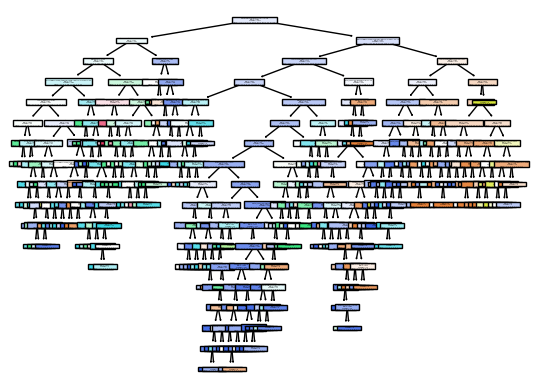

In [31]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=.2,random_state=100)

cart = tree.DecisionTreeClassifier(min_samples_leaf = 5) # Control min leaf size
cart = cart.fit(X2_train, y2_train) # Fit the classifier
y2_hat = cart.predict(X2_test)
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)

In [32]:
## Confusion Matrix:
tab = pd.crosstab(y2_test,y2_hat) # Compute confusion matrix
acc = np.trace(tab)/len(y2_test) # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y2_test,y2_hat)

Accuracy:  0.4088669950738916 



col_0,A,AA,AAA,B,BB,BBB,CCC
Rating,,,,,,,
A,39,9,0,3,8,32,0
AA,4,8,0,1,0,5,1
AAA,0,1,0,0,0,0,0
B,5,0,0,28,19,14,4
BB,11,0,0,24,37,24,4
BBB,19,1,1,12,26,54,2
CCC,1,0,0,6,1,1,0
D,0,0,0,1,0,0,0


Accuracy nearly doubled when ratings agency was added in as a factor for determining overall rating

Q3. This is a case study about classification and regression trees.

Load the Breast Cancer METABRIC.csv dataset. How many observations and variables does it contain? Print out the first few rows of data.

In [38]:
df = pd.read_csv('/Users/averyanderson/Desktop/data/Breast_Cancer_METABRIC.csv',low_memory=False) #read in data

In [40]:
df.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [42]:
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables
print(df.columns, '\n') # Column names

(2509, 34) 

Patient ID                         object
Age at Diagnosis                  float64
Type of Breast Surgery             object
Cancer Type                        object
Cancer Type Detailed               object
Cellularity                        object
Chemotherapy                       object
Pam50 + Claudin-low subtype        object
Cohort                            float64
ER status measured by IHC          object
ER Status                          object
Neoplasm Histologic Grade         float64
HER2 status measured by SNP6       object
HER2 Status                        object
Tumor Other Histologic Subtype     object
Hormone Therapy                    object
Inferred Menopausal State          object
Integrative Cluster                object
Primary Tumor Laterality           object
Lymph nodes examined positive     float64
Mutation Count                    float64
Nottingham prognostic index       float64
Oncotree Code                      object
Overall Survival (Mon

We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include Tumor Size, Lymph nodes examined positive, Age at Diagnosis. For categorical variables, we'll include Tumor Stage, Chemotherapy, and Cancer Type Detailed. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, X .

In [45]:
df2 = pd.get_dummies(df, columns=['Tumor Stage','Chemotherapy','Cancer Type Detailed'])
columns = df2.columns.tolist()
print(columns)

['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type', 'Cellularity', 'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade', 'HER2 status measured by SNP6', 'HER2 Status', 'Tumor Other Histologic Subtype', 'Hormone Therapy', 'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality', 'Lymph nodes examined positive', 'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code', 'Overall Survival (Months)', 'Overall Survival Status', 'PR Status', 'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status', 'Sex', '3-Gene classifier subtype', 'Tumor Size', "Patient's Vital Status", 'Tumor Stage_0.0', 'Tumor Stage_1.0', 'Tumor Stage_2.0', 'Tumor Stage_3.0', 'Tumor Stage_4.0', 'Chemotherapy_No', 'Chemotherapy_Yes', 'Cancer Type Detailed_Breast', 'Cancer Type Detailed_Breast Angiosarcoma', 'Cancer Type Detailed_Breast Invasive Ductal Carcinoma', 'Cancer Type Detailed_Breast Invasi

In [47]:
y2 = df2['Overall Survival Status'] # Target variable

vars = ['Age at Diagnosis', 'Lymph nodes examined positive', 'Tumor Size', 
         'Tumor Stage_0.0', 'Tumor Stage_1.0', 'Tumor Stage_2.0', 'Tumor Stage_3.0', 'Tumor Stage_4.0',
         'Chemotherapy_No', 'Chemotherapy_Yes', 'Cancer Type Detailed_Breast', 'Cancer Type Detailed_Breast Angiosarcoma',
         'Cancer Type Detailed_Breast Invasive Ductal Carcinoma', 'Cancer Type Detailed_Breast Invasive Lobular Carcinoma',
         'Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma', 'Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma',
         'Cancer Type Detailed_Invasive Breast Carcinoma', 'Cancer Type Detailed_Metaplastic Breast Cancer']

X2 = df2.loc[:,vars] # Construct data matrix
X2.head() # Peek at data

,Age at Diagnosis,Lymph nodes examined positive,Tumor Size,Tumor Stage_0.0,Tumor Stage_1.0,Tumor Stage_2.0,Tumor Stage_3.0,Tumor Stage_4.0,Chemotherapy_No,Chemotherapy_Yes,Cancer Type Detailed_Breast,Cancer Type Detailed_Breast Angiosarcoma,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Cancer Type Detailed_Metaplastic Breast Cancer
0,75.65,10.0,22.0,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False
1,43.19,0.0,10.0,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False
2,48.87,1.0,15.0,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False
3,47.68,3.0,25.0,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False
4,76.97,8.0,40.0,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False


In [49]:
print(df2.shape, '\n') # List the dimensions of df

(2509, 46) 



In [53]:
total_na_count = df2.isna().sum().sum()
print("\nTotal NaN count:", total_na_count)


Total NaN count: 9679


In [55]:
df2 = df2.dropna()
total_na_count = df2.isna().sum().sum()
print("\nTotal NaN count:", total_na_count)


Total NaN count: 0


In [59]:
y2 = df2['Overall Survival Status'] # Target variable

vars = ['Age at Diagnosis', 'Lymph nodes examined positive', 'Tumor Size', 
         'Tumor Stage_0.0', 'Tumor Stage_1.0', 'Tumor Stage_2.0', 'Tumor Stage_3.0', 'Tumor Stage_4.0',
         'Chemotherapy_No', 'Chemotherapy_Yes', 'Cancer Type Detailed_Breast', 'Cancer Type Detailed_Breast Angiosarcoma',
         'Cancer Type Detailed_Breast Invasive Ductal Carcinoma', 'Cancer Type Detailed_Breast Invasive Lobular Carcinoma',
         'Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma', 'Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma',
         'Cancer Type Detailed_Invasive Breast Carcinoma', 'Cancer Type Detailed_Metaplastic Breast Cancer']

X2 = df2.loc[:,vars] # Construct data matrix
X2.head() # Peek at data

,Age at Diagnosis,Lymph nodes examined positive,Tumor Size,Tumor Stage_0.0,Tumor Stage_1.0,Tumor Stage_2.0,Tumor Stage_3.0,Tumor Stage_4.0,Chemotherapy_No,Chemotherapy_Yes,Cancer Type Detailed_Breast,Cancer Type Detailed_Breast Angiosarcoma,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Cancer Type Detailed_Metaplastic Breast Cancer
1,43.19,0.0,10.0,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False
4,76.97,8.0,40.0,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False
5,78.77,0.0,31.0,False,False,False,False,True,True,False,False,False,True,False,False,False,False,False
10,86.41,1.0,16.0,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False
11,84.22,0.0,28.0,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False


Let's predict Overall Survival Status given the features/covariates . There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

[Text(0.5727768456375839, 0.9705882352941176, 'Age at Diagnosis <= 60.925\ngini = 0.495\nsamples = 1137\nvalue = [627, 510]'),
 Text(0.3678691275167785, 0.9117647058823529, 'Lymph nodes examined positive <= 8.5\ngini = 0.474\nsamples = 535\nvalue = [206, 329]'),
 Text(0.3028523489932886, 0.8529411764705882, 'Tumor Size <= 27.5\ngini = 0.461\nsamples = 507\nvalue = [183, 324]'),
 Text(0.21308724832214765, 0.7941176470588235, 'Age at Diagnosis <= 58.315\ngini = 0.421\nsamples = 368\nvalue = [111, 257]'),
 Text(0.14429530201342283, 0.7352941176470589, 'Lymph nodes examined positive <= 1.5\ngini = 0.399\nsamples = 302\nvalue = [83, 219]'),
 Text(0.087248322147651, 0.6764705882352942, 'Tumor Size <= 24.5\ngini = 0.366\nsamples = 245\nvalue = [59, 186]'),
 Text(0.053691275167785234, 0.6176470588235294, 'Age at Diagnosis <= 39.465\ngini = 0.338\nsamples = 204\nvalue = [44, 160]'),
 Text(0.026845637583892617, 0.5588235294117647, 'Tumor Size <= 17.5\ngini = 0.087\nsamples = 22\nvalue = [1, 21]'

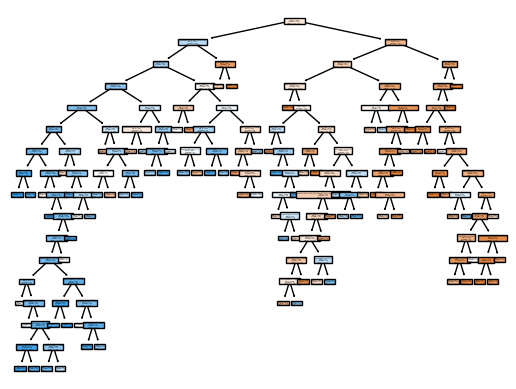

In [61]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=.2,random_state=100)

cart = tree.DecisionTreeClassifier(min_samples_leaf = 10) # Control min leaf size
cart = cart.fit(X2_train, y2_train) # Fit the classifier
y2_hat = cart.predict(X2_test)
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)

In [65]:
## Confusion Matrix:
tab = pd.crosstab(y2_test,y2_hat) # Compute confusion matrix
acc = np.trace(tab)/len(y2_test) # Faster way to compute accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y2_test,y2_hat)

Accuracy:  0.6350877192982456 



col_0,Deceased,Living
Overall Survival Status,,
Deceased,125,50
Living,54,56


For your model in part three, compute three statistics: (true positive rate + true negative rate)
Does your model tend to perform better with respect to one of these metrics?

True postive = 125/125 +50 = 125/175 = .714
True negative = 56/ 56 +54 = 56/110 = .50

The model performed better with respect to true postive rate

Let's predict Overall Survival (Months) given the features/covariates X. Use the train/test split to pick the optimal min_samples_leaf value that gives the highest R squared on the test set (it's about 110). Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [69]:
y3 = df2['Overall Survival (Months)'] # Target variable
X2_train, X2_test, y3_train, y3_test = train_test_split(X2,y3,test_size=.2,random_state=100)

In [93]:
#google AI helped with this section
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

r2_scores = []
leaf_values = range(1, 150) 

for leaf in leaf_values:
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    model.fit(X2_train, y3_train)
    y3_pred = model.predict(X2_test)
    score = r2_score(y3_test, y3_pred)
    r2_scores.append(score)

In [91]:
best_leaf = leaf_values[np.argmax(r2_scores)]
best_r2 = max(r2_scores)
print(f"min_samples: {best_leaf}")
print(f"r squared: {best_r2}")

min_samples: 53
r squared: 0.13569429436355884


In [85]:
y_pred = model.predict(X2_test)

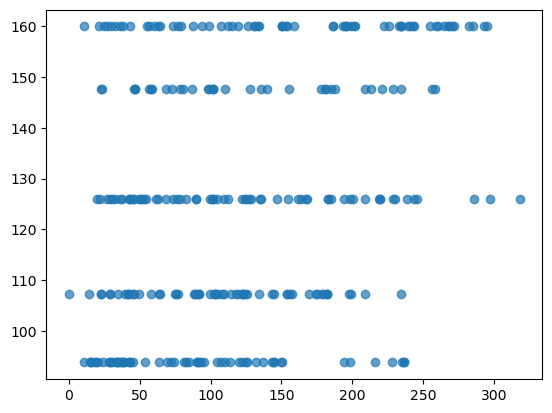

In [89]:
plt.scatter(y3_test, y_pred, alpha=0.7) 

I would not want to use this model for clinical purposes mainly because of the nature of what it is predicting. This model is fairly accurate (even if it was closer to accurate I would want to use more data before relying on it) and because this would be used to tell families an estimate about potentially how long someone may live with cancer, this model would be far to inaccurate to be a helpful guide for such important information. 